In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
order_products_train_df = pd.read_csv("./order_products__train.csv")
order_products_prior_df = pd.read_csv("./order_products__prior.csv")
orders_df = pd.read_csv("./orders.csv")
products_df = pd.read_csv("./products.csv")
aisles_df = pd.read_csv("./aisles.csv")
departments_df = pd.read_csv("./departments.csv")

In [113]:
products_df

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [3]:
order_products_train_df['reordered'].value_counts(normalize= True) * 100

1    59.859441
0    40.140559
Name: reordered, dtype: float64

In [5]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce


In [85]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


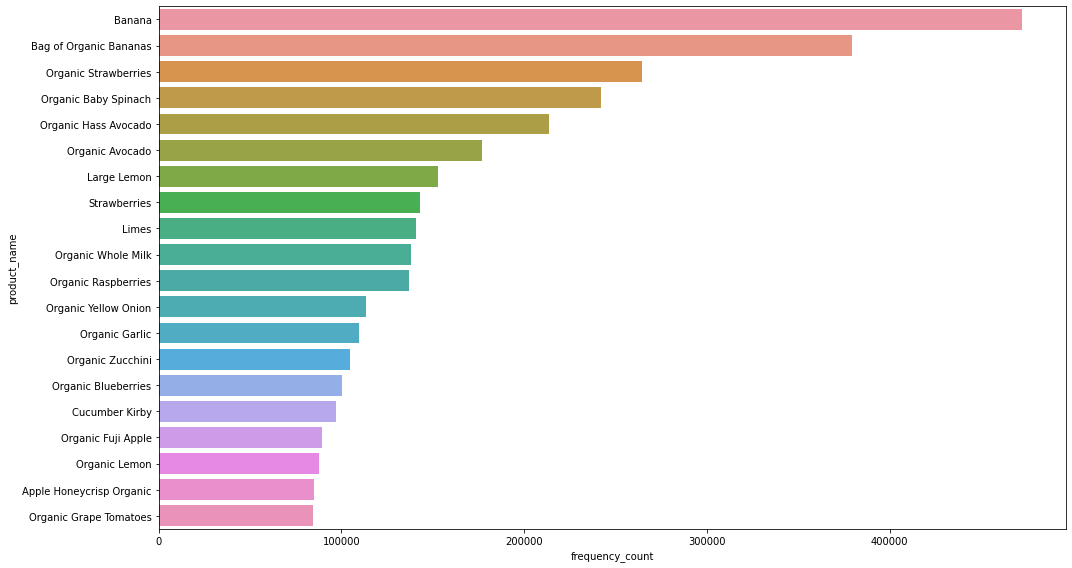

In [100]:
plt.figure(figsize=(15,8))
sns.barplot(cnt_srs.frequency_count, cnt_srs.product_name)
plt.tight_layout()

Most of them are organic products! Also majority of them are fruits.

## Preprocessing 

In [9]:
orders = orders_df.merge(order_products_prior_df, on = 'order_id')

In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


In [11]:
user_orders_count = orders.groupby('user_id')[ 'order_number'].max().to_frame('user_orders').reset_index()

In [101]:
user_orders_count.sort_values(by ='user_orders', ascending=False)

,user_id,user_orders
152339,152340,99
185640,185641,99
185523,185524,99
81677,81678,99
70921,70922,99
...,...,...
13045,13046,3
70207,70208,3
111439,111440,3
31761,31762,3


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

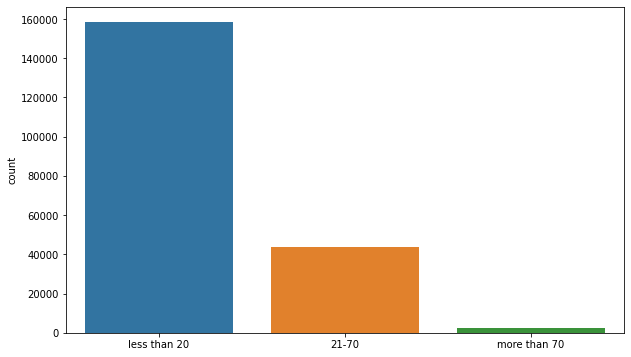

In [112]:
plt.figure(figsize=(10,6))
bins = [0,21, 71, 91]
labels = ['less than 20', '21-70' , 'more than 70']
user_orders_count_bin = pd.cut(user_orders_count['user_orders'], bins = bins, labels= labels, right= False)
sns.countplot(user_orders_count_bin.values)

In [13]:
products_per_order = orders.groupby(['user_id', 'order_id'])['product_id'].count().to_frame('total_products_ordered').reset_index()

In [14]:
products_per_order

,user_id,order_id,total_products_ordered
0,1,431534,8
1,1,473747,5
2,1,550135,5
3,1,2254736,5
4,1,2295261,6
...,...,...,...
3214869,206209,2307371,3
3214870,206209,2558525,3
3214871,206209,2977660,9
3214872,206209,3154581,13


In [15]:
avg_products_per_order = products_per_order.groupby('user_id')['total_products_ordered'].mean().to_frame('avg_products_in_an_order').reset_index()

In [16]:
avg_products_per_order

,user_id,avg_products_in_an_order
0,1,5.900000
1,2,13.928571
2,3,7.333333
3,4,3.600000
4,5,9.250000
...,...,...
206204,206205,10.666667
206205,206206,4.253731
206206,206207,13.937500
206207,206208,13.816327


In [18]:
user_orders = user_orders_count.merge(avg_products_per_order, on= 'user_id', how='left')

In [19]:
user_orders

,user_id,user_orders,avg_products_in_an_order
0,1,10,5.900000
1,2,14,13.928571
2,3,12,7.333333
3,4,5,3.600000
4,5,4,9.250000
...,...,...,...
206204,206205,3,10.666667
206205,206206,67,4.253731
206206,206207,16,13.937500
206207,206208,49,13.816327


## Products

In [23]:
products_count =  orders.groupby('product_id')['reordered'].aggregate(['count','mean']).reset_index()

In [24]:
products_count.rename(columns = {'count':'reordered_count', 'mean': 'reordered_ratio'}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Department wise Reorder(%)')

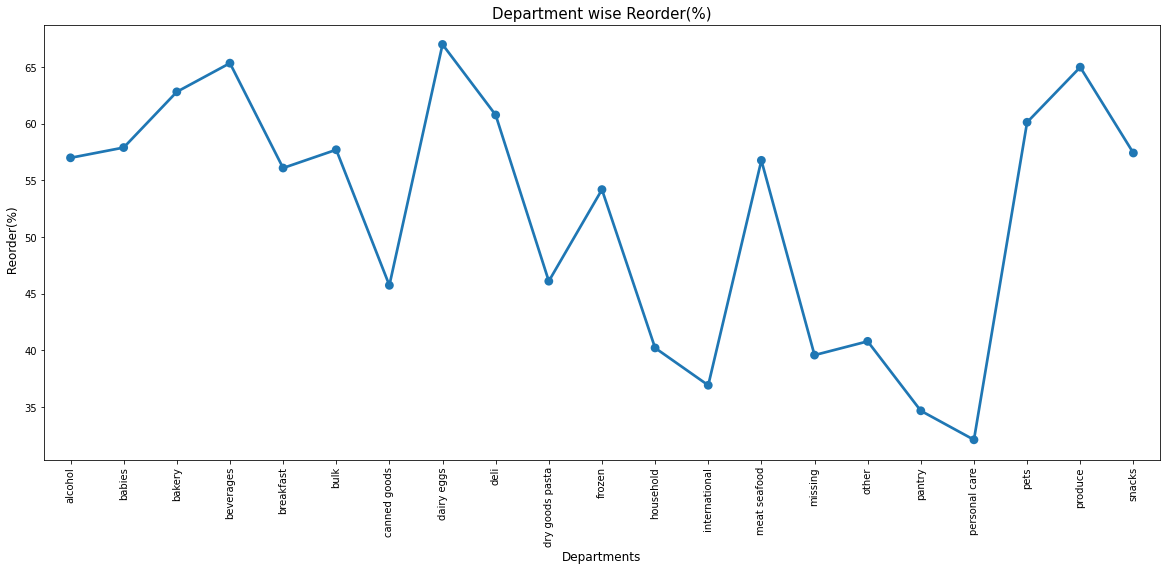

In [126]:
reorder_freq = order_products_prior_df.groupby('department')['reordered'].aggregate('mean').reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(reorder_freq['department'].values,reorder_freq['reordered'].values * 100)
plt.xticks(rotation = 'vertical')
plt.xlabel('Departments', fontsize= 12)
plt.ylabel(' Reorder(%)', fontsize = 12)
plt.title('Department wise Reorder(%)', fontsize = 15)

Personal Care lowest reordering percentage and dairy eggs highest

In [25]:
products_count

,product_id,reordered_count,reordered_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,0.600000
...,...,...,...
49672,49684,9,0.111111
49673,49685,49,0.122449
49674,49686,120,0.700000
49675,49687,13,0.461538


In [26]:
user_product_info = orders.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('products_count_user_in_order').reset_index()

In [27]:
user_product_info

,user_id,product_id,products_count_user_in_order
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3
...,...,...,...
13307948,206209,43961,3
13307949,206209,44325,1
13307950,206209,48370,1
13307951,206209,48697,1


In [28]:
user_product_avg_info = orders.groupby(['user_id', 'product_id'])['reordered'].mean().to_frame('products_count_user_in_order_mean').reset_index()

In [29]:
user_product_avg_info

,user_id,product_id,products_count_user_in_order_mean
0,1,196,0.900000
1,1,10258,0.888889
2,1,10326,0.000000
3,1,12427,0.900000
4,1,13032,0.666667
...,...,...,...
13307948,206209,43961,0.666667
13307949,206209,44325,0.000000
13307950,206209,48370,0.000000
13307951,206209,48697,0.000000


In [30]:
user_product_avg_count_info = user_product_info.merge(user_product_avg_info, on = ['user_id', 'product_id'])
user_product_avg_count_info

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean
0,1,196,10,0.900000
1,1,10258,9,0.888889
2,1,10326,1,0.000000
3,1,12427,10,0.900000
4,1,13032,3,0.666667
...,...,...,...,...
13307948,206209,43961,3,0.666667
13307949,206209,44325,1,0.000000
13307950,206209,48370,1,0.000000
13307951,206209,48697,1,0.000000


In [31]:
total_data =  user_product_avg_count_info.merge(user_orders, on='user_id',how='left')
total_data

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean,user_orders,avg_products_in_an_order
0,1,196,10,0.900000,10,5.900000
1,1,10258,9,0.888889,10,5.900000
2,1,10326,1,0.000000,10,5.900000
3,1,12427,10,0.900000,10,5.900000
4,1,13032,3,0.666667,10,5.900000
...,...,...,...,...,...,...
13307948,206209,43961,3,0.666667,13,9.923077
13307949,206209,44325,1,0.000000,13,9.923077
13307950,206209,48370,1,0.000000,13,9.923077
13307951,206209,48697,1,0.000000,13,9.923077


In [32]:
total_data = total_data.merge(products_count, on ='product_id')
total_data

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean,user_orders,avg_products_in_an_order,reordered_count,reordered_ratio
0,1,196,10,0.900000,10,5.900000,35791,0.776480
1,15,196,5,0.800000,22,3.272727,35791,0.776480
2,19,196,3,0.666667,9,22.666667,35791,0.776480
3,21,196,1,0.000000,33,6.212121,35791,0.776480
4,31,196,2,0.500000,20,14.950000,35791,0.776480
...,...,...,...,...,...,...,...,...
13307948,200463,8682,1,0.000000,4,9.500000,2,0.000000
13307949,203389,8682,1,0.000000,17,11.705882,2,0.000000
13307950,202557,43553,13,0.923077,31,10.838710,13,0.923077
13307951,203436,42338,2,0.500000,3,12.666667,2,0.500000


In [33]:
order_future = orders_df.loc[((orders_df.eval_set == 'train') | (orders_df.eval_set == 'test')), ['user_id', 'eval_set', 'order_id']]
order_future


,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797
...,...,...,...
3420933,206205,train,1716008
3421001,206206,test,1043943
3421018,206207,test,2821651
3421068,206208,test,803273


In [34]:
train_test_data = total_data.merge(order_future, on='user_id', how='left')
train_test_data.head()

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean,user_orders,avg_products_in_an_order,reordered_count,reordered_ratio,eval_set,order_id
0,1,196,10,0.900000,10,5.900000,35791,0.77648,train,1187899
1,15,196,5,0.800000,22,3.272727,35791,0.77648,test,2161313
2,19,196,3,0.666667,9,22.666667,35791,0.77648,test,1735923
3,21,196,1,0.000000,33,6.212121,35791,0.77648,train,1854765
4,31,196,2,0.500000,20,14.950000,35791,0.77648,test,280888


In [36]:
train_data =  train_test_data[train_test_data['eval_set']=='train']

In [37]:
train_data = train_data.merge(order_products_train_df[['product_id', 'order_id', 'reordered']], on=['product_id', 'order_id'], how='left')
train_data

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean,user_orders,avg_products_in_an_order,reordered_count,reordered_ratio,eval_set,order_id,reordered
0,1,196,10,0.900000,10,5.900000,35791,0.776480,train,1187899,1.0
1,21,196,1,0.000000,33,6.212121,35791,0.776480,train,1854765,NaN
2,43,196,2,0.500000,11,13.363636,35791,0.776480,train,1864787,NaN
3,52,196,14,0.928571,27,6.259259,35791,0.776480,train,1647290,NaN
4,67,196,19,0.947368,24,3.375000,35791,0.776480,train,2757217,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8474656,200351,15408,1,0.000000,11,5.000000,2,0.000000,train,1768329,NaN
8474657,205587,15408,1,0.000000,10,13.200000,2,0.000000,train,2444330,NaN
8474658,203389,8682,1,0.000000,17,11.705882,2,0.000000,train,300189,NaN
8474659,202557,43553,13,0.923077,31,10.838710,13,0.923077,train,2335762,NaN


In [38]:
train_data.reordered.fillna(0, inplace=True)

In [39]:
train_data = train_data.merge(products_df[['product_id', 'aisle_id','department_id']], on='product_id', how='left')

In [40]:
train_data

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean,user_orders,avg_products_in_an_order,reordered_count,reordered_ratio,eval_set,order_id,reordered,aisle_id,department_id
0,1,196,10,0.900000,10,5.900000,35791,0.776480,train,1187899,1.0,77,7
1,21,196,1,0.000000,33,6.212121,35791,0.776480,train,1854765,0.0,77,7
2,43,196,2,0.500000,11,13.363636,35791,0.776480,train,1864787,0.0,77,7
3,52,196,14,0.928571,27,6.259259,35791,0.776480,train,1647290,0.0,77,7
4,67,196,19,0.947368,24,3.375000,35791,0.776480,train,2757217,1.0,77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474656,200351,15408,1,0.000000,11,5.000000,2,0.000000,train,1768329,0.0,20,11
8474657,205587,15408,1,0.000000,10,13.200000,2,0.000000,train,2444330,0.0,20,11
8474658,203389,8682,1,0.000000,17,11.705882,2,0.000000,train,300189,0.0,114,17
8474659,202557,43553,13,0.923077,31,10.838710,13,0.923077,train,2335762,0.0,64,7


In [41]:
train_data.drop(['eval_set', 'order_id'], axis=1, inplace=True)

In [42]:
week_day =  orders.groupby('user_id')['order_dow'].agg(lambda x: pd.Series.mode(x)[0]).to_frame('day_of_week_most_ordered').reset_index()

In [43]:
hour_day = orders.groupby('user_id')['order_hour_of_day'].agg(lambda x: pd.Series.mode(x)[0]).to_frame('hour_of_day_most_ordered').reset_index()

In [44]:
train_data = train_data.merge(week_day, on='user_id', how='left')
train_data = train_data.merge(hour_day, on ='user_id', how='left')

In [45]:
train_data

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean,user_orders,avg_products_in_an_order,reordered_count,reordered_ratio,reordered,aisle_id,department_id,day_of_week_most_ordered,hour_of_day_most_ordered
0,1,196,10,0.900000,10,5.900000,35791,0.776480,1.0,77,7,4,7
1,21,196,1,0.000000,33,6.212121,35791,0.776480,0.0,77,7,1,9
2,43,196,2,0.500000,11,13.363636,35791,0.776480,0.0,77,7,4,12
3,52,196,14,0.928571,27,6.259259,35791,0.776480,0.0,77,7,1,10
4,67,196,19,0.947368,24,3.375000,35791,0.776480,1.0,77,7,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474656,200351,15408,1,0.000000,11,5.000000,2,0.000000,0.0,20,11,3,11
8474657,205587,15408,1,0.000000,10,13.200000,2,0.000000,0.0,20,11,1,22
8474658,203389,8682,1,0.000000,17,11.705882,2,0.000000,0.0,114,17,1,10
8474659,202557,43553,13,0.923077,31,10.838710,13,0.923077,0.0,64,7,4,13


In [46]:
train_data.to_csv('SAS__Train_File.csv', index = False)


In [47]:
test_data =  train_test_data[train_test_data['eval_set']=='test']
test_data.drop(['eval_set', 'order_id'], axis=1, inplace=True)
test_data
#final_data_test = final_data_test.set_index(['user_id', 'product_id'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean,user_orders,avg_products_in_an_order,reordered_count,reordered_ratio
1,15,196,5,0.800000,22,3.272727,35791,0.77648
2,19,196,3,0.666667,9,22.666667,35791,0.77648
4,31,196,2,0.500000,20,14.950000,35791,0.77648
10,98,196,7,0.857143,14,3.571429,35791,0.77648
16,290,196,2,0.500000,51,31.176471,35791,0.77648
...,...,...,...,...,...,...,...,...
13307938,194078,40747,1,0.000000,18,11.166667,2,0.00000
13307940,194639,45378,1,0.000000,46,10.304348,1,0.00000
13307942,196359,48343,1,0.000000,10,8.100000,1,0.00000
13307948,200463,8682,1,0.000000,4,9.500000,2,0.00000


In [48]:
#final_data_test.reset_index(inplace=True)
test_data = test_data.merge(products_df[['product_id', 'aisle_id']], on='product_id', how='left')
test_data

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mean,user_orders,avg_products_in_an_order,reordered_count,reordered_ratio,aisle_id
0,15,196,5,0.800000,22,3.272727,35791,0.77648,77
1,19,196,3,0.666667,9,22.666667,35791,0.77648,77
2,31,196,2,0.500000,20,14.950000,35791,0.77648,77
3,98,196,7,0.857143,14,3.571429,35791,0.77648,77
4,290,196,2,0.500000,51,31.176471,35791,0.77648,77
...,...,...,...,...,...,...,...,...,...
4833287,194078,40747,1,0.000000,18,11.166667,2,0.00000,20
4833288,194639,45378,1,0.000000,46,10.304348,1,0.00000,22
4833289,196359,48343,1,0.000000,10,8.100000,1,0.00000,27
4833290,200463,8682,1,0.000000,4,9.500000,2,0.00000,114


In [49]:
test_data = test_data.merge(products_df[['product_id', 'department_id']], on='product_id', how='left')

In [50]:
test_data = test_data.merge(week_day, on='user_id', how='left')
test_data =  test_data.merge(hour_day, on ='user_id', how='left')

In [51]:
test_data.to_csv('SAS_test_file.csv', index = False)

In [52]:
results_sas_prediction = pd.read_csv('./em_save_SCORE.csv')
results_sas_prediction

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mea,user_orders,avg_products_in_an_order,count,mean,aisle_id,department_id,...,_NODE_,Q_reordered1,Q_reordered0,V_reordered1,V_reordered0,U_reordered,EM_SEGMENT,EM_EVENTPROBABILITY,EM_PROBABILITY,EM_CLASSIFICATION
0,15,196,5,0.800000,22,3.272727,35791,0.77648,77,7,...,115,0.194456,0.805544,0.194784,0.805216,0,115,0.194456,0.805544,0
1,19,196,3,0.666667,9,22.666667,35791,0.77648,77,7,...,101,0.195661,0.804339,0.191612,0.808388,0,101,0.195661,0.804339,0
2,31,196,2,0.500000,20,14.950000,35791,0.77648,77,7,...,93,0.081846,0.918154,0.079529,0.920471,0,93,0.081846,0.918154,0
3,98,196,7,0.857143,14,3.571429,35791,0.77648,77,7,...,114,0.270733,0.729267,0.275476,0.724524,0,114,0.270733,0.729267,0
4,290,196,2,0.500000,51,31.176471,35791,0.77648,77,7,...,94,0.043501,0.956499,0.042418,0.957582,0,94,0.043501,0.956499,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833287,194078,40747,1,0.000000,18,11.166667,2,0.00000,20,11,...,80,0.020517,0.979483,0.021074,0.978926,0,80,0.020517,0.979483,0
4833288,194639,45378,1,0.000000,46,10.304348,1,0.00000,22,11,...,85,0.012676,0.987324,0.012811,0.987189,0,85,0.012676,0.987324,0
4833289,196359,48343,1,0.000000,10,8.100000,1,0.00000,27,5,...,80,0.020517,0.979483,0.021074,0.978926,0,80,0.020517,0.979483,0
4833290,200463,8682,1,0.000000,4,9.500000,2,0.00000,114,17,...,64,0.027231,0.972769,0.027076,0.972924,0,64,0.027231,0.972769,0


In [53]:
results_sas_prediction.columns

Index(['user_id', 'product_id', 'products_count_user_in_order',
       'products_count_user_in_order_mea', 'user_orders',
       'avg_products_in_an_order', 'count', 'mean', 'aisle_id',
       'department_id', 'day_of_week_most_ordered', 'hour_of_day_most_ordered',
       '_WARN_', '_NODE_', 'Q_reordered1', 'Q_reordered0', 'V_reordered1',
       'V_reordered0', 'U_reordered', 'EM_SEGMENT', 'EM_EVENTPROBABILITY',
       'EM_PROBABILITY', 'EM_CLASSIFICATION'],
      dtype='object')

In [55]:
results_sas_prediction.drop(['_WARN_', '_NODE_', 'Q_reordered1', 'Q_reordered0', 'V_reordered1',
       'V_reordered0', 'U_reordered', 'EM_SEGMENT', 'EM_EVENTPROBABILITY',
       'EM_PROBABILITY'], axis = 1)

,user_id,product_id,products_count_user_in_order,products_count_user_in_order_mea,user_orders,avg_products_in_an_order,count,mean,aisle_id,department_id,day_of_week_most_ordered,hour_of_day_most_ordered,EM_CLASSIFICATION
0,15,196,5,0.800000,22,3.272727,35791,0.77648,77,7,1,11,0
1,19,196,3,0.666667,9,22.666667,35791,0.77648,77,7,5,12,0
2,31,196,2,0.500000,20,14.950000,35791,0.77648,77,7,0,11,0
3,98,196,7,0.857143,14,3.571429,35791,0.77648,77,7,0,9,0
4,290,196,2,0.500000,51,31.176471,35791,0.77648,77,7,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833287,194078,40747,1,0.000000,18,11.166667,2,0.00000,20,11,5,13,0
4833288,194639,45378,1,0.000000,46,10.304348,1,0.00000,22,11,4,15,0
4833289,196359,48343,1,0.000000,10,8.100000,1,0.00000,27,5,1,10,0
4833290,200463,8682,1,0.000000,4,9.500000,2,0.00000,114,17,1,15,0


In [56]:
results_sas_prediction.rename(columns = {'EM_CLASSIFICATION':'reorder'}, inplace = True)

In [58]:
test_orders = orders_df.loc[orders_df.eval_set == 'test', ['user_id', 'order_id']]
test_orders.head()

,user_id,order_id
38,3,2774568
44,4,329954
53,6,1528013
96,11,1376945
102,12,1356845


In [60]:
results_sas_prediction = results_sas_prediction[['product_id', 'user_id', 'reordered']]
results_sas_prediction

,product_id,user_id,reordered
0,196,15,0
1,196,19,0
2,196,31,0
3,196,98,0
4,196,290,0
...,...,...,...
4833287,40747,194078,0
4833288,45378,194639,0
4833289,48343,196359,0
4833290,8682,200463,0


In [61]:
results_sas_prediction = results_sas_prediction.merge(test_orders, on='user_id', how='left')
results_sas_prediction

,product_id,user_id,reordered,order_id
0,196,15,0,2161313
1,196,19,0,1735923
2,196,31,0,280888
3,196,98,0,139487
4,196,290,0,3116687
...,...,...,...,...
4833287,40747,194078,0,2879036
4833288,45378,194639,0,2290690
4833289,48343,196359,0,3118660
4833290,8682,200463,0,1427614


In [62]:
#remove user_id column
results_sas_prediction = results_sas_prediction.drop('user_id', axis=1)

In [63]:
results_sas_prediction

,product_id,reordered,order_id
0,196,0,2161313
1,196,0,1735923
2,196,0,280888
3,196,0,139487
4,196,0,3116687
...,...,...,...
4833287,40747,0,2879036
4833288,45378,0,2290690
4833289,48343,0,3118660
4833290,8682,0,1427614


In [88]:
#convert product_id as integer
results_sas_prediction['product_id'] = results_sas_prediction.product_id.astype(int)
results_sas_prediction[results_sas_prediction['order_id'] == 2680431]

,product_id,reordered,order_id
1058539,4210,0,2680431
1209181,5748,0,2680431
1962517,19488,0,2680431
2262466,5488,0,2680431
2626412,12679,0,2680431
2994731,42240,0,2680431
3570103,17781,0,2680431
3705298,11190,0,2680431
3751459,21219,0,2680431
4037998,2152,0,2680431


In [65]:
d = dict()
for row in results_sas_prediction.itertuples():
    if row.reorder == 1:
        try:
            d[row.order_id] += ', ' + order_products_prior_df[order_products_prior_df['product_id'] == row.product_id]['product_name'].values[0]
        except:
            d[row.order_id] = order_products_prior_df[order_products_prior_df['product_id'] == row.product_id]['product_name'].values[0]

for order in results_sas_prediction.order_id:
    if order not in d:
        d[order] = 'None'

In [66]:
d

{1797124: 'Soda, Mineral Water',
 1294240: 'Soda',
 1122524: 'Soda, Organic Half & Half, Medium Roast Ground Coffee',
 532252: 'Soda',
 311568: 'Soda',
 1595359: 'Soda, Popcorn',
 1602660: 'Soda',
 3329139: 'Soda, Original Beef Jerky',
 2303533: "Soda, 0% Greek Strained Yogurt, Zero Calorie Cola, Organic Half & Half, Crunchy Oats 'n Honey Granola Bars",
 2923107: 'Soda, Seltzer Water',
 533819: 'Soda, Sparkling Mineral Water',
 632572: 'Soda',
 1638005: 'Soda, Sparkling Water',
 1086178: "Soda, Bag of Organic Bananas, Clementines, Crunchy Oats 'n Honey Granola Bars, Mozzarella String Cheese, Pub Mix",
 2415485: 'Soda, Drinking Water',
 298807: 'Soda, Natural String Cheese, Freshly Made. Filled with Creamy Ricotta, Aged Parmesan and Romano Cheeses Mixed Cheese Tortellini, Rise Krisipies Toasted Rice Cereal, Natural Muenster Cheese Slices, Plates 10 1/16 inch 26 Ct',
 2729767: 'Soda',
 1859098: 'Soda, Reduced Fat 2% Milk',
 761640: 'Soda',
 3055633: 'Soda, Strawberries, Organic Blueberri

In [94]:
import csv
d1 = [d]
csv_columns = ['order_id','product_names']
cart_order_prediction = 'cart_order_prediction.csv'
with open(cart_order_prediction, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for data in d1:
        writer.writerow(data)

AttributeError: 'str' object has no attribute 'keys'